In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

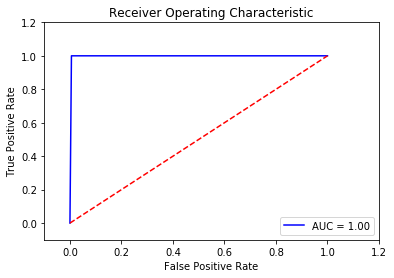

In [2]:
data=pd.read_csv("IMDB-Movie-Data.csv")
data=data.dropna(axis=0, how='any')

#Data for Evaluation
X = data[data.columns[6:32]]
Y=data.iloc[:,-1]

#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model and Training
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
adaboost_model.fit(X_train, Y_train)
y_pred = adaboost_model.predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [3]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)

Confusion Matrix is :
[[172   1]
 [  0  37]]

Accuracy is :
0.995238095238

Precision is :
0.973684210526

Recall is: 
1.0
